In [12]:
print ('y        x1      x2       x3       x4      x5     x6       x7')
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit([[getattr(t, 'x%d' % i) for i in range(1, 8)] for t in data],
        [t.y for t in texts])

y        x1      x2       x3       x4      x5     x6       x7


AttributeError: 'numpy.ndarray' object has no attribute 'x1'

In [22]:
import csv as csv
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit([[getattr(t, 'x%d' % i) for i in range(1, 8)] for t in df],
        [t.y for t in df])

AttributeError: 'str' object has no attribute 'x1'

In [50]:
import pandas as pd

df = pd.read_csv("texts.csv")
df.iloc[:,1:3]

,x1,x2
0,-4.95,-5.87
1,-4.55,-4.52
2,-10.96,-11.64
3,-1.08,-3.36
4,-6.52,-7.45
5,-0.81,-2.36
6,-7.01,-7.33
7,-4.46,-7.65
8,-11.54,-10.03


In [56]:
import pandas as pd

df = pd.read_csv("texts.csv")
#df=df.transpose
#data=df.values
df
res = ols(df)

TypeError: ols() takes 0 positional arguments but 1 was given

In [55]:
help(ols)

Help on function ols in module pandas.stats.interface:

ols(**kwargs)
    Returns the appropriate OLS object depending on whether you need
    simple or panel OLS, and a full-sample or rolling/expanding OLS.
    
    Will be a normal linear regression or a (pooled) panel regression depending
    on the type of the inputs:
    
    y : Series, x : DataFrame -> OLS
    y : Series, x : dict of DataFrame -> OLS
    y : DataFrame, x : DataFrame -> PanelOLS
    y : DataFrame, x : dict of DataFrame/Panel -> PanelOLS
    y : Series with MultiIndex, x : Panel/DataFrame + MultiIndex -> PanelOLS
    
    Parameters
    ----------
    y: Series or DataFrame
        See above for types
    x: Series, DataFrame, dict of Series, dict of DataFrame, Panel
    weights : Series or ndarray
        The weights are presumed to be (proportional to) the inverse of the
        variance of the observations.  That is, if the variables are to be
        transformed by 1/sqrt(W) you must supply weights = 1/W
    i

In [3]:
import statsmodels as sm
sm.ols

AttributeError: 'module' object has no attribute 'ols'

In [6]:
%%bash
pip install patsy

In [8]:
import pandas as pd
from pandas.stats.api import ols
df = pd.DataFrame({"A": [10,20,30,40,50], "B": [20, 30, 10, 40, 50], "C": [32, 234, 23, 23, 42523]})
res = ols(y=df['A'], x=df[['B','C']])
res

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <B> + <C> + <intercept>

Number of Observations:         5
Number of Degrees of Freedom:   3

R-squared:         0.5789
Adj R-squared:     0.1577

Rmse:             14.5108

F-stat (2, 2):     1.3746, p-value:     0.4211

Degrees of Freedom: model 2, resid 2

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             B     0.4012     0.6497       0.62     0.5999    -0.8723     1.6746
             C     0.0004     0.0005       0.65     0.5826    -0.0007     0.0014
     intercept    14.9525    17.7643       0.84     0.4886   -19.8655    49.7705
---------------------------------End of Summary---------------------------------

In [1]:
rank=[x for x in data['rank'] if x <1E100] 
level=[[2*x,x+10] for x in data['rank'] if x <1E100] 
rankdataB=[x+20 for x in data['rank'] if x <1E100] 
rankdataC=[3*x+20 for x in data['rank'] if x <1E100] 

NameError: name 'data' is not defined

$\mbox{rank} = \mbox{const}+ B\times \mbox{hoursplayed} + C \times \mbox{wins}$

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
data = pd.read_json("Overwatch090317.json")

In [42]:
rank=[x for x in data['rank']] 
level=[x for x in data['level']] 
wins=[x for x in data.get('comp', {})]
# winsdata=[x for x in wins.index[x]]
# wins=[x for x in data['comp'] if x <1E100]  
a=wins[0]
b=a.get('total',{})
b.get('wins',{})
def getWins(x):
    b=x.get('total',{})
    return(b.get('wins',{}))
winsExtracted =[getWins(x) for x in  wins]


In [43]:
#[x for x in rank if x <1e100]
def filterNaN(x):
    if x<1e100:
        return(x)
    else:
        return(0)#0 ->treat NaN as no rank
rankFiltered=[filterNaN(x) for x in rank ]
levelFiltered= [filterNaN(x) for x in level]

In [45]:
from pandas.stats.api import ols
df = pd.DataFrame({"Rank": rankFiltered, "Level": level, "Wins":winsExtracted})
res = ols(y=df['Rank'], x=df[['Level','Wins']])
res

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Level> + <Wins> + <intercept>

Number of Observations:         43
Number of Degrees of Freedom:   3

R-squared:         0.1530
Adj R-squared:     0.1106

Rmse:            819.0021

F-stat (2, 40):     3.6124, p-value:     0.0361

Degrees of Freedom: model 2, resid 40

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Level     7.9046     5.4789       1.44     0.1569    -2.8341    18.6433
          Wins    25.8045    10.4896       2.46     0.0183     5.2448    46.3642
     intercept  1299.1246   427.6140       3.04     0.0042   461.0011  2137.2481
---------------------------------End of Summary---------------------------------

In [22]:
data.to_xarray()

ModuleNotFoundError: No module named 'xarray'

In [124]:
rankdata=[x for x in data['rank'] if x <1E100] # is x < 'infinity'

In [125]:
import matplotlib.pyplot as plt

## plotting

plot y vs x .plot(array[0],array[1]),

where array[0] is the x-value and  array[1] is the y value

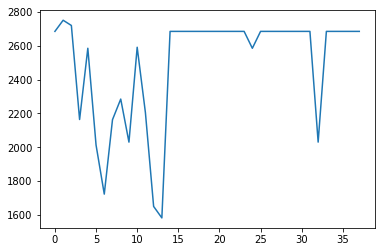

In [129]:
%matplotlib inline
plt.plot(rankdata)
plt.show()

In [46]:
compdata=data['comp']

In [47]:
compdata.as_matrix()

array([ {'total': {'defAssists': 39, 'rate': 62, 'medals': 106, 'offAssists': 22, 'bronze': 34, 'objTime': 0.7455555555555551, 'healing': 78945, 'loss': 11, 'games': 29, 'onFire': 1.191666666666666, 'kpd': 3.03, 'multikills': 9, 'timePlayed': 7, 'silver': 33, 'melee': 10, 'soloKills': 122, 'objKills': 417, 'envKills': 9, 'wins': 18, 'elims': 939, 'cards': 12, 'damageDone': 468463, 'gold': 39, 'deaths': 310, 'multikillBest': 4, 'finalBlows': 481, 'envDeaths': 2}, 'most': {'defAssists': 14, 'healing': 16985, 'damageDone': 33724, 'onFire': 0.13277777777777702, 'soloKills': 38, 'offAssists': 13, 'objKills': 33, 'elims': 67, 'melee': 3, 'finalBlows': 38, 'objTime': 0.054722222222222006}, 'average': {'healing': 2722, 'deaths': 10.68, 'soloKills': 4.2, 'objKills': 14.37, 'damageDone': 16154, 'elims': 32.37, 'melee': 0.34, 'finalBlows': 16.58, 'objTime': 0.025555555555555002, 'onFire': 0.040833333333333006}},
       {'total': {'defAssists': 25, 'rate': 30, 'medals': 58, 'offAssists': 11, 'bron